In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
from sklearn.model_selection import train_test_split

#This line is erroring (ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics') bc "plot_roc_curve" has been removed an replaced with RocCurveDisplay
#from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score,plot_roc_curve
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, RocCurveDisplay

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [62]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [63]:
data = pd.read_csv('Creditcard.csv')

In [64]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [65]:
data.shape

(284807, 31)

In [66]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [68]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [69]:
data.isnull().values.any()

False

In [70]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [71]:
data.drop_duplicates(inplace=True)

In [72]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

After duplicate rows removal we are left with 283253 and 473 for Valid and Fraud cases respectively. 

In [73]:
print(sum(data['Amount']))

25102001.67998364


Except Amount and Class other features looks linearly reduced. This is expected as per given data set specifications. 
Total Txn Amount= 25102001 from total number of txn: 283253

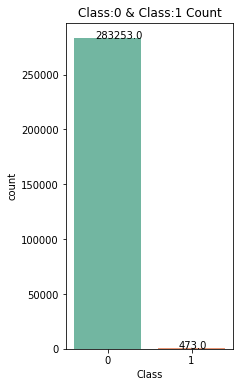

In [74]:
#graphical representation of class: 0 and class:1 counts
plt.figure(figsize=(3,6))
plt.title('Class:0 & Class:1 Count')
ax = sns.countplot(data['Class'],palette = "Set2");
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [75]:
# determine the number of fraud cases
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
fraud_percentage = (len(fraud)/(len(fraud)+len(valid)))*100

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))
print('Outlier Fraction: {}'.format(outlier_fraction))
print('Fraud Percentage: {}'.format(fraud_percentage))

Fraud Cases: 473
Valid Cases: 283253
Outlier Fraction: 0.0016698852262818046
Fraud Percentage: 0.1667101358352777


Provided dataset has only 0.173% of transaction are of class:1 (fraud) which means, data is totally unbalanced with respect to target variable Class.

In [76]:
agg1 = data.groupby(['Class'])['Amount'].agg(['std','min','max','mean','sum'])
agg1

,std,min,max,mean,sum
Class,,,,,
0,250.379023,0.0,25691.16,88.413575,25043410.29
1,260.211041,0.0,2125.87,123.871860,58591.39


Class 1 (Fraud cases) having higher avg. txn amount still have max. txn amount very less (10%) of class 0,

In [77]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(data[data.Class==1]), len(data[data.Class==1])/len(data)*100000))

Number of fraudulent transactions = 473 or 166 per 100,000 transactions in the dataset


Amount data is the only column which is not scaled. Make this column scalable to have get precise predictions. Lets apply standard scalar on Amount data. 

In [78]:
scaler = StandardScaler()
data["NormalizedAmount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))

In [79]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,NormalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073813


### Lets drop Amount Column as we already have NormalizedAmount

In [80]:
data.drop(["Amount"], inplace= True, axis= 1)

In [81]:
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

In [82]:
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Looks like Fradulent transactions are distributed evenlly and don't have spikes during a specific time. Lets try few more comparision between these classes vs. txn Amount

In [83]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['NormalizedAmount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,-0.353327,30.447236,3929,-366.547949,-0.093293,-0.301450,0.733048
1,0.0,1,-0.353327,1.759301,2,1.405975,0.702987,0.702987,2.231599
2,1.0,0,-0.353327,6.714154,2211,-199.156237,-0.090075,-0.261473,0.320341
3,1.0,1,-0.117703,0.604864,2,0.487161,0.243581,0.243581,0.261051
4,2.0,0,-0.353327,15.632680,1552,-121.111591,-0.078036,-0.281501,0.724637


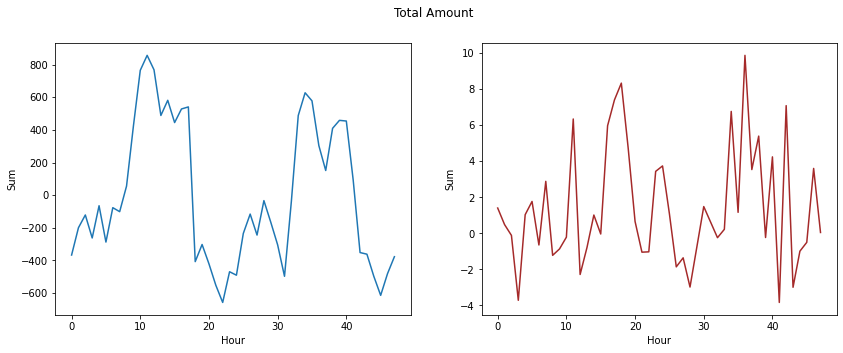

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="brown")
plt.suptitle("Total Amount")
plt.show();

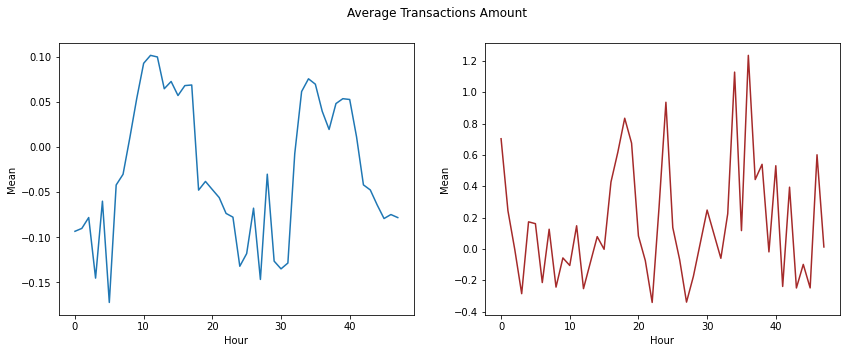

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="brown")
plt.suptitle("Average Transactions Amount")
plt.show();

## Box Plot for Amount vs Class

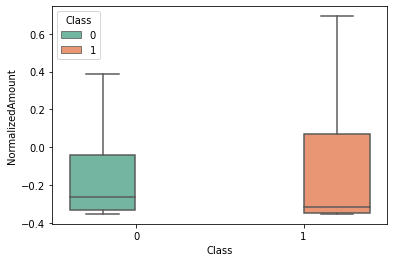

In [86]:
ax= sns.boxplot(x="Class", y="NormalizedAmount", hue="Class",data=data, palette="Set2",showfliers=False)

In [87]:
#dropping Hour columns added for above TxAmount vs. Hour analysis
data.drop(["Hour"], inplace= True, axis= 1)

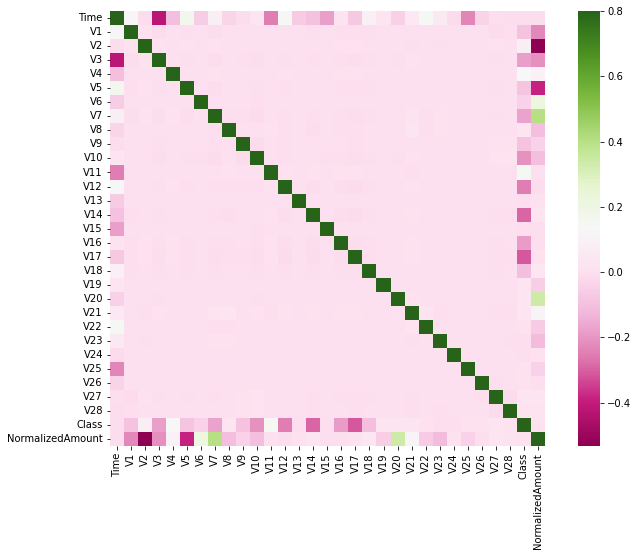

In [88]:
# correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 8))
#sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corrmat, vmax = .8, square = True,cmap="PiYG")
plt.show()

NormalizedAmount v2,v5 (Inverse)  v7, v20 (Direct)
Time V3 V11 (Inverse)

In [89]:
cmAmountV2Data = data[['Class','NormalizedAmount','V2']]
cmAmountV5Data = data[['Class','NormalizedAmount','V5']]
cmAmountV7Data = data[['Class','NormalizedAmount','V7']]
cmAmountV20Data = data[['Class','NormalizedAmount','V20']]
cmTimeV3Data = data[['Class','Time','V3']]
cmTimeV11Data = data[['Class','Time','V11']]

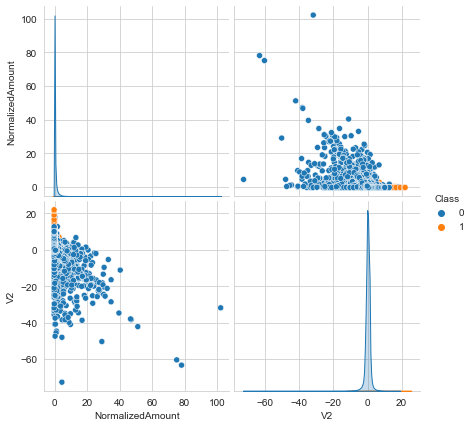

In [90]:
sns.set_style("whitegrid")
sns.pairplot(cmAmountV2Data,hue="Class",size=3);

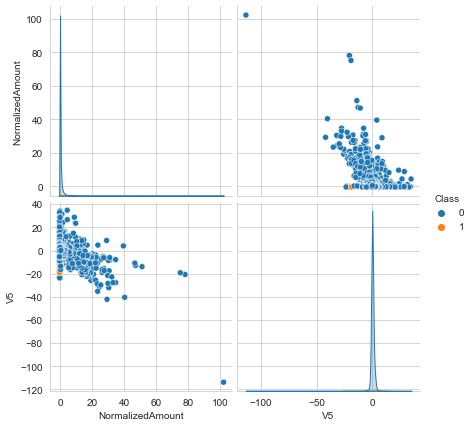

In [31]:
sns.set_style("whitegrid")
sns.pairplot(cmAmountV5Data,hue="Class",size=3);

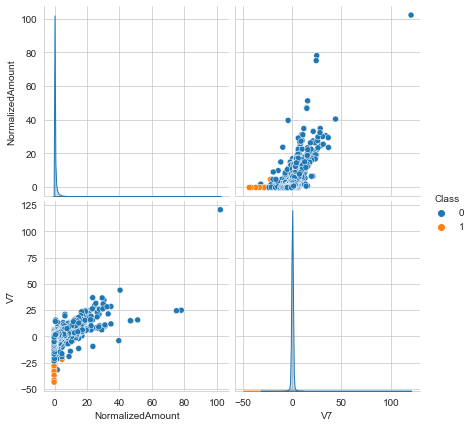

In [32]:
sns.set_style("whitegrid")
sns.pairplot(cmAmountV7Data,hue="Class",size=3);

<Figure size 432x288 with 0 Axes>

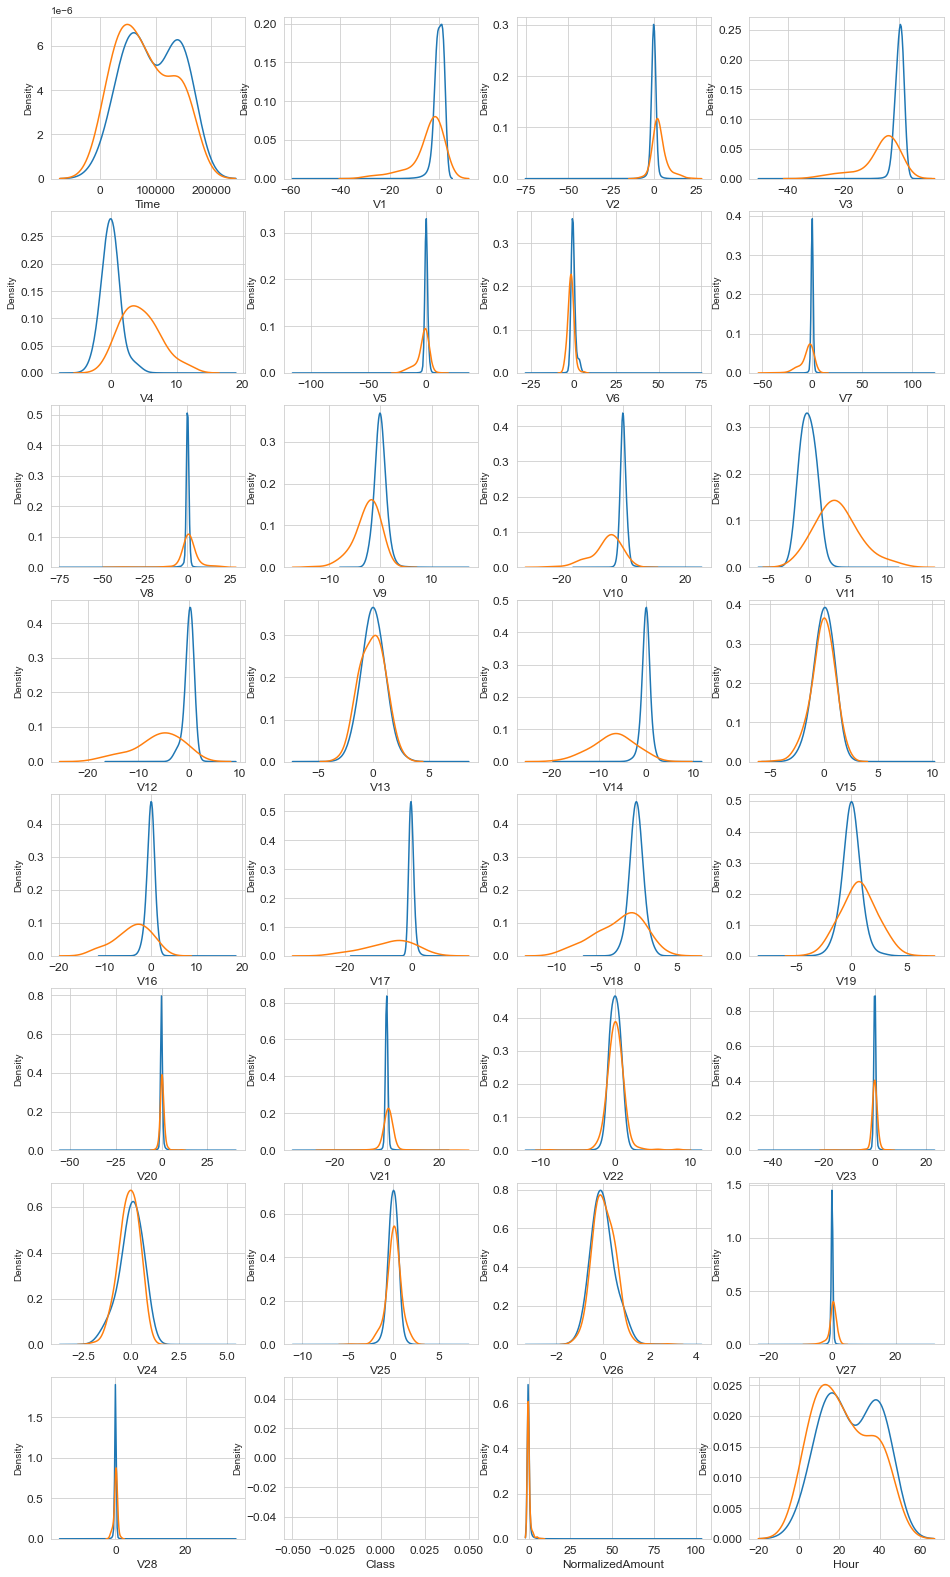

In [34]:
var = data.columns.values

i = 0
c0 = data.loc[data['Class'] == 0]
c1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(c0[feature], bw=0.5,label="Non-Fraud")
    sns.kdeplot(c1[feature], bw=0.5,label="Fraud")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

clear Sepearable Distributions: V4,V11
Partial Seperable Distributions: V12,V14 and V18

#### Dropping the “Time” column as it is irrelevant, we have observed before.

In [6]:
data.drop(["Time"], inplace= True, axis= 1)
Y = data["Class"]
X = data.drop(["Class"], axis= 1)

In [7]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.9133925541004


In [28]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[85265    42]
 [   32   104]]


In [29]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99913
Precision: 0.71233
Recall: 0.76471
F1-score: 0.73759


## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.95903701883127


In [54]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)
#plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

Confusion Matrix - Random Forest
[[85300     7]
 [   28   108]]


In [55]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99959
Precision: 0.93913
Recall: 0.79412
F1-score: 0.86056


### K-Nearest Neighbors  ### Left due to huge processing time

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs")
lr.fit(train_X, train_Y)
predictions_Log = lr.predict(test_X)

In [25]:
confusion_matrix_kNN = confusion_matrix(test_Y, predictions_Log.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_kNN)

Confusion Matrix - Logistic Regression
[[85295    12]
 [   51    85]]


In [26]:
print("Evaluation of Logistic Regression Model")
print()
metrics(test_Y, predictions_Log.round())

Evaluation of Logistic Regression Model

Accuracy: 0.99926
Precision: 0.87629
Recall: 0.62500
F1-score: 0.72961


#### SVM #### Left due to huge processing time, not suitable for large dataset

## XGBoost 

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 4)
xgb.fit(train_X, train_Y)
predictions_XGBoost = xgb.predict(test_X)

[19:28:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
confusion_matrix_XGBoost = confusion_matrix(test_Y, predictions_XGBoost.round())
print("Confusion Matrix - XGBoost")
print(confusion_matrix_XGBoost)

Confusion Matrix - XGBoost
[[85301     6]
 [   25   111]]


In [20]:
print("Evaluation of XGBoost Model")
print()
metrics(test_Y, predictions_XGBoost.round())

Evaluation of XGBoost Model

Accuracy: 0.99964
Precision: 0.94872
Recall: 0.81618
F1-score: 0.87747


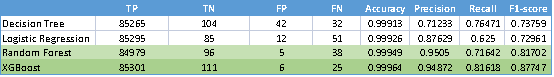

XGBoost Performed best compare to other algorithms for provided data set. Due to performance issues we didn't consider KNN and SVM. Now lets try with ANN

In [31]:
# Creating the ANN model for Credit Card Fraud Detection
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [41]:
# Initializing the ANN
model = Sequential()

Creating a simple NN with following parameters::

fully-connected layers: 5

Activation: ReLu

Input Vector Lenght: 29

Output Activation Function: Sigmoid to classify result as non-fraud (0) or fraud (1)

a dropout step is included to prevent overfitting.

In [42]:
# Adding the input layer and first Hidden Layer
model.add(Dense(activation = "relu", input_dim = 29, units = 6, kernel_initializer='uniform' ))

# Adding the Second hidden layer
model.add(Dense(activation = "relu", units =20, kernel_initializer='uniform'))

##add Dropout(0.5) here to prevent overfitting::: wip- Amit

# Adding the third hidden layer
model.add(Dense(activation = "relu", units = 10, kernel_initializer='uniform'))

# Addinng the output Layer
model.add(Dense(activation = 'sigmoid', units =1, kernel_initializer='uniform',))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 180       
                                                                 
 dense_9 (Dense)             (None, 20)                140       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [44]:
# compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [45]:
# Fitting the ANN to the training set
model.fit(train_X, train_Y, batch_size = 100, epochs =10)

Epoch 1/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0414 - accuracy: 0.9979
Epoch 2/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0042 - accuracy: 0.9982
Epoch 3/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0036 - accuracy: 0.9983
Epoch 4/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 5/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 6/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 7/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 8/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 9/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 10/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.002

In [47]:
# Making the Prediction and Evaluating the model
# Predicting the Test set result
y_pred = model.predict(test_X)
y_pred = (y_pred>0.5)

In [48]:
confusion_matrix_XGBoost = confusion_matrix(test_Y, y_pred.round())
print("Confusion Matrix - ANN")
print(confusion_matrix_XGBoost)

Confusion Matrix - NN
[[85274    33]
 [   24   112]]


In [49]:
print("Evaluation of ANN Model")
print()
metrics(test_Y, y_pred.round())

Evaluation of NN Model

Accuracy: 0.99933
Precision: 0.77241
Recall: 0.82353
F1-score: 0.79715
